<a href="https://colab.research.google.com/github/sanchitkripalani47/DSBDA/blob/main/Assignment6_31145.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name: Sanchit Kripalani <br> Batch: M1 <br> Roll No: 31145

### Problem Statement

Data Analytics III

1. Implement Simple Naive Bayes classification algorithm using Python/R on Iris.csv dataset.

2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on th given dataset.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Load the data
raw_data = load_iris()
X = raw_data
raw_data = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)

In [ ]:
# We also load the target variable separately
y = load_iris().target

raw_data['Species'] = y

In [ ]:
print(y[:10])

[0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Use .head() to print first 5 entires
raw_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Data Preprocessing

In [ ]:
# Use .info() to get summary of the data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# Use .describe() to print statistical summary 
raw_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Check for null values
raw_data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [ ]:
# Print the size of the dataset
print('The number of rows are: ', raw_data.shape[0])
print('The number of columns are: ', raw_data.shape[1])

The number of rows are:  150
The number of columns are:  5


In [ ]:
# Check the number of unique values in y
print('The unique values in target is: ', np.unique(raw_data['Species']))

The unique values in target is:  [0 1 2]


### Visualization

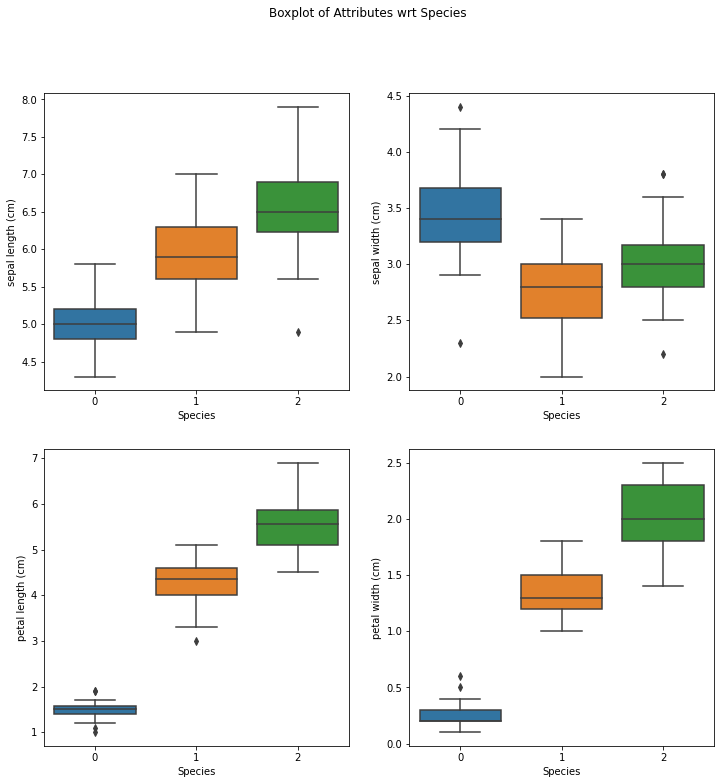

In [ ]:
# Plotting boxplots to show outliers

fig, axes = plt.subplots(2,2, figsize=(12,12))
axes_flat = axes.flatten()

x = ['sepal length (cm)', 'sepal width (cm)','petal length (cm)', 'petal width (cm)']

for index, col in enumerate(x):
    axis = axes_flat[index]
    sns.boxplot(data=raw_data, x='Species', y=col, ax=axis)
    fig.suptitle("Boxplot of Attributes wrt Species")

**Observations**

It is observed that there are outliers present in the independent variables. We will have to see whether outliers need to be removed in order to make the model more accurate.

### Model Creation

In [ ]:
# Splitting the data into training and testing
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X.data, y, test_size=0.25, random_state=42)

In [ ]:
# Create a naive Bayes Model using Sklearn library
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Get the predicted classes
y_preds = classifier.predict(X_test)

### Analyzing the predictions

**Note: The above is an example of what a confusion matrix looks like.**

The important statistical data inferred with the help of confusion matrix are: 

- Sensitivity: The model's ability of to correctly identify true positives

- Specificity: The model's ability of to correctly identify true negatives

In [ ]:
# Create a function to plot the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion(test_y, prediction):
    cm = confusion_matrix(test_y, prediction)

    plot1 = ConfusionMatrixDisplay(confusion_matrix=cm, 
                       display_labels=classifier.classes_)

    plot1.plot()
    plt.grid(False)
    plt.show()
    
    FP = cm.sum(axis=0) - np.diag(cm) 
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)
    
    #Print Important Statistical terms
    Specificity = (TN) / (TN + FP)
    print("\nSpecificity is: {}".format(Specificity*100))

    Sensitivity = (TP) / (TP + FN)
    print("Sensitivity/Recall is: {}%".format(Sensitivity*100))
    
    Accuracy = (TP+TN) / (TP+TN+FP+FN)
    print("Accuracy is: {}%".format(Accuracy*100))
    
    error = (FP+FN) / (TP+TN+FP+FN)
    print("Error Rate is: {}%".format(error*100))
    
    precision = (TP) / (TP+FP)
    print('Precision is: {}%'.format(precision*100))

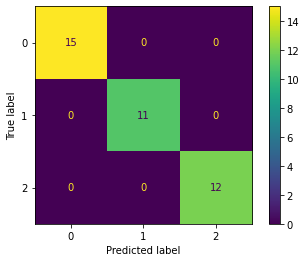


Specificity is: [100. 100. 100.]
Sensitivity/Recall is: [100. 100. 100.]%
Accuracy is: [100. 100. 100.]%
Error Rate is: [0. 0. 0.]%
Precision is: [100. 100. 100.]%


In [ ]:
plot_confusion(y_test, y_preds)

**Observations**

Thus the model has 100% accuracy.